In [2]:
import pandas as pd

In [28]:
path = 'gdppcap_data.csv'
df = pd.read_csv(path)

In [162]:
df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23512.602596,24985.993281,24713.698045,26189.435509,26647.938101,27980.880695,28281.350482,29007.693003,NaN,NaN
1,Afghanistan,AFG,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,...,543.303042,591.162759,641.871479,637.165523,613.856689,578.466353,547.228110,556.302002,524.162881,502.115487
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2973.591160
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5352.857411
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40852.666777,43335.328862,38686.461264,39538.766722,41303.929371,35762.523074,37474.665406,38962.880354,41793.055258,40886.391165


In [176]:
df.iloc[54].unique()

array(['Djibouti', 'DJI', nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, 801.172727261608, nan, 761.470312414935,
       748.1952491985339, 725.7425320694679, 766.1409545474,
       762.0113217330639, 777.262329602146, 753.5201888937829,
       790.032265170134, 789.551769053208, 767.500314974148,
       760.635021178711, 755.7616935832781, 765.856135000962,
       768.1760767471201, 780.9082226423219, 791.389478167512,
       818.86662978308, 863.2316123414571, 904.729748876566,
       967.668622919565, 1052.72565197384, 1223.8568609209801,
       1267.31280083416, 1343.2687299443699, 1451.5429798438902,
       1559.24065068226, 2312.72880330353, 2464.3278411936103,
       2658.9787526018104, 2802.19705115707, 2914.3838563125105,
       3141.88921873893, 3408.84625440838], dtype=object)

In [30]:
df.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 65'], axis=1, inplace=True)

In [34]:
df.dropna(axis=1, how='all', inplace=True)

In [197]:
df.dropna(axis=0, thresh=4, inplace=True)

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [226]:
idx2names = list(df['Country Name'])
names2idx = {name:i for i, name in enumerate(idx2names)}
names2idx

{'Aruba': 0,
 'Afghanistan': 1,
 'Angola': 2,
 'Albania': 3,
 'Andorra': 4,
 'Arab World': 5,
 'United Arab Emirates': 6,
 'Argentina': 7,
 'Armenia': 8,
 'American Samoa': 9,
 'Antigua and Barbuda': 10,
 'Australia': 11,
 'Austria': 12,
 'Azerbaijan': 13,
 'Burundi': 14,
 'Belgium': 15,
 'Benin': 16,
 'Burkina Faso': 17,
 'Bangladesh': 18,
 'Bulgaria': 19,
 'Bahrain': 20,
 'Bahamas, The': 21,
 'Bosnia and Herzegovina': 22,
 'Belarus': 23,
 'Belize': 24,
 'Bermuda': 25,
 'Bolivia': 26,
 'Brazil': 27,
 'Barbados': 28,
 'Brunei Darussalam': 29,
 'Bhutan': 30,
 'Botswana': 31,
 'Central African Republic': 32,
 'Canada': 33,
 'Central Europe and the Baltics': 34,
 'Switzerland': 35,
 'Channel Islands': 36,
 'Chile': 37,
 'China': 38,
 "Cote d'Ivoire": 39,
 'Cameroon': 40,
 'Congo, Dem. Rep.': 41,
 'Congo, Rep.': 42,
 'Colombia': 43,
 'Comoros': 44,
 'Cabo Verde': 45,
 'Costa Rica': 46,
 'Caribbean small states': 47,
 'Cuba': 48,
 'Curacao': 49,
 'Cayman Islands': 50,
 'Cyprus': 51,
 'Czech

In [199]:
npdf = df.drop(['Country Name', 'Country Code'], axis=1).to_numpy()

In [200]:
dflist = [np.array(x) for x in npdf.tolist()]

In [221]:
linregs = []
for i, ylist in enumerate(dflist):
    lm = LinearRegression()
    notnan = ylist==ylist
    xvals = (np.array([i for i in range(1960, 2020)])[notnan]).reshape((-1,1))
    yvals = ylist[notnan]
    reg = lm.fit(xvals, yvals)
#     print(names[i])
    linregs.append(reg)

In [126]:
import matplotlib.pyplot as plt

In [234]:
X = np.array([1960, 2019]).reshape((-1,1))
Y = [lm.predict([x])[0] for x in X]

[287.01491780915967, 1134.7073112059443]

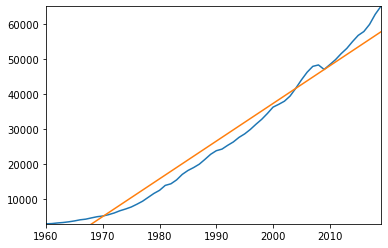

In [238]:
def showplot(country):
    idx = names2idx[country]
    ylist = dflist[idx]
    notnan = ylist==ylist
    xvals = (np.array([i for i in range(1960, 2020)])[notnan]).reshape((-1,1))
    yvals = ylist[notnan]
    lm = linregs[idx]

    plt.plot(xvals, yvals)
    X = np.array([1960, 2019]).reshape((-1,1))
    Y = [lm.predict([x])[0] for x in X]
    plt.plot(X,Y)
    plt.axis([1960, 2019, np.amin(yvals), np.amax(yvals)])
showplot('United States')